In [1]:
# Import libraries

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Import train, test data CSVs. 
# In this dataset, train set ground truth labels are in a separate file (train_result.csv)
# Test set ground truth are not available - accuracy is displayed once you submit predictions to Kaggle

In [4]:
x_train = pd.read_csv('train_data.csv', header=None)

In [5]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.121137e-23,1.912855e-24,-2.714186e-25,-1.033976e-25,-9.693523e-27,1.292470e-26,0.000000e+00,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.488651e-07,-3.077714e-07,-4.218542e-08,1.239896e-07,-3.092443e-08,9.199901e-09,-2.096919e-09,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.512289e-06,-2.520655e-07,-4.363775e-08,4.532246e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN


In [6]:
y_train = pd.read_csv('train_result.csv')

In [7]:
y_train

,Index,Results
0,0,14
1,1,9
2,2,9
3,3,15
4,4,13
...,...,...
99995,99995,13
99996,99996,18
99997,99997,22
99998,99998,16


In [8]:
x_test = pd.read_csv('test_data.csv', header=None)

In [9]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
# Data preprocessing

In [11]:
x_train = x_train.iloc[: , :-1]  # Final column is NaN - remove this column
x_test = x_test.iloc[:, :-1]
# Format of data is already in floats, no need for further preprocessing.

In [12]:
# Data exploration

In [13]:
sample1 = x_train.iloc[0].to_numpy()

In [14]:
sample1

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
sample1 = (sample1 * 255).reshape(56,56) # Multiply floats to pixel values (0-255 range)
# Reshape 1D array (3136x1) to 2D array (56x56) so we can view image.

In [16]:
sample1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

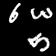

In [17]:
im = Image.fromarray(sample1)
im.convert("L") # Grayscale

In [18]:
# Numbers are 6, 3, 5. Ground truth label for this example is 14. 
# So we need to add all the numbers we find in each image.
# Makes sense, as the competition is called 'real-life addition'!
# Checking with another random example

In [19]:
sample2 = x_train.iloc[6324].to_numpy()

In [20]:
sample2 = (sample2 * 255).reshape(56,56) 

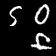

In [21]:
im2 = Image.fromarray(sample2)
im2.convert("L") # 5 + 0 + 4 (rotated 90 degrees to the right) = 9. 
# So our ground truth should be 9.

In [22]:
y_train.iloc[6324][1] # Confirming ground truth for this example is 9. 

9

In [ ]:
# The maximum value of ground truth will be 27, as 9 + 9 + 9 = 27 
# (Highest value for each digit, assuming only 3 numbers per image/example). 
# So the architecture will be 28 output nodes in the final layer of our neural network (incl. 0)

In [23]:
# For curiosity, I look at distribution of ground truth labels in training set
y_train['Results'].value_counts(normalize=True)
# There is a higher proportion of 12,13,14,15 because there are more ways to add
# to these numbers than adding to 27, 0. 

12    0.07449
13    0.07444
14    0.07296
15    0.07175
11    0.06974
16    0.06757
10    0.06426
17    0.06207
9     0.05707
18    0.05336
8     0.04552
19    0.04352
7     0.03711
20    0.03469
6     0.02915
21    0.02668
5     0.02188
22    0.02136
4     0.01635
23    0.01404
3     0.01146
24    0.01016
2     0.00646
25    0.00616
1     0.00320
26    0.00277
27    0.00092
0     0.00086
Name: Results, dtype: float64

In [25]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.926167e-24,-6.121137e-23,1.912855e-24,-2.714186e-25,-1.033976e-25,-9.693523e-27,1.292470e-26,0.000000e+00,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.831783e-07,3.488651e-07,-3.077714e-07,-4.218542e-08,1.239896e-07,-3.092443e-08,9.199901e-09,-2.096919e-09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.188470e-06,1.512289e-06,-2.520655e-07,-4.363775e-08,4.532246e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [26]:
y_train

,Index,Results
0,0,14
1,1,9
2,2,9
3,3,15
4,4,13
...,...,...
99995,99995,13
99996,99996,18
99997,99997,22
99998,99998,16


In [27]:
# Build model - I used CNN, as this is go-to for image recognition.

In [28]:
model2 = Sequential()
# Start with convolution layers
# Specify input shape (56,56,1) - image shape
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(56, 56, 1)))
model2.add(MaxPooling2D((2, 2)))
# Alternate convoluion and maxpooling
model2.add(Conv2D(64, (3, 3), activation='relu' ))
model2.add(MaxPooling2D((2, 2)))
# Dropout to prevent overfitting
model2.add(Dropout(0.25))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
# Flatten before dense layers
model2.add(Flatten())
# Include a dense layer before final layer
model2.add(Dense(256, activation='relu')) 
# Anther dropout for overfitting
model2.add(Dropout(0.25))
# Final layer - softmax activation to get probability distribution for each class
model2.add(Dense(28, activation='softmax')) 
opt = Adam(learning_rate=0.001)

2022-11-13 12:02:24.787217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Cross-entropy is default for multi-class classification
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# One-hot encode ground truth labels for training
y_labels = pd.get_dummies(y_train['Results'])

In [31]:
y_labels

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.926167e-24,-6.121137e-23,1.912855e-24,-2.714186e-25,-1.033976e-25,-9.693523e-27,1.292470e-26,0.000000e+00,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.831783e-07,3.488651e-07,-3.077714e-07,-4.218542e-08,1.239896e-07,-3.092443e-08,9.199901e-09,-2.096919e-09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.188470e-06,1.512289e-06,-2.520655e-07,-4.363775e-08,4.532246e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [33]:
# Need to resize x_train to be 56x56 for fitting to CNN model.
x_train = np.resize(x_train,(100000,56,56))

In [ ]:
# Train our model using x_train and train ground truth labels.
model2.fit(x_train, y_labels, epochs=100, batch_size=256, validation_split = 0.1)

In [ ]:
# Train accuracy = 0.9297

In [35]:
# Resize x_test the same way as we did for x_train
x_test = np.resize(x_test,(50000,56,56))

In [36]:
x_test.shape

(50000, 56, 56)

In [37]:
# Predict with our test set!
prediction = model2.predict(x_test)

1563/1563 [==============================] - 71s 45ms/step


In [38]:
# Append predictions to array
predictions = []
for i in range(len(prediction)):
  # Take argmax (highest probability value from 28 output nodes) as our prediction
  predictions.append([i, np.argmax(prediction[i])]) 

In [ ]:
# Save output predictions so we can upload to Kaggle!
np.savetxt("output.csv", predictions, fmt='%s', delimiter=",")

In [ ]:
# Test accuracy = 0.86500 (https://www.kaggle.com/competitions/real-life-addition/leaderboard)